In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from apyori import apriori

In [20]:
file=input("Enter the dataset file name : ")
g_dataa=pd.read_csv(file+'.csv')
g_dataa = pd.DataFrame(g_dataa)

Enter the dataset file name : grc


Num of points : 10


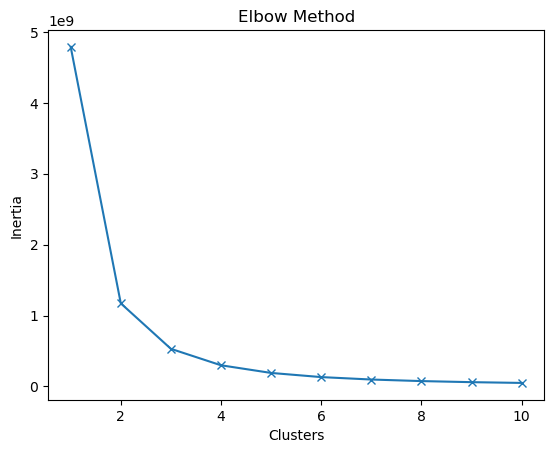

In [21]:
data = g_dataa[['age', 'total']]
points = int(input('Num of points : '))
m = []
n = []
for q in range(1, points+1):
    kmeans = KMeans(n_clusters=q)
    kmeans.fit(data)
    m.append(q)
    n.append(kmeans.inertia_)
plt.plot(m, n, 'x-')
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

Num of points : 10
Num of clusters : 5


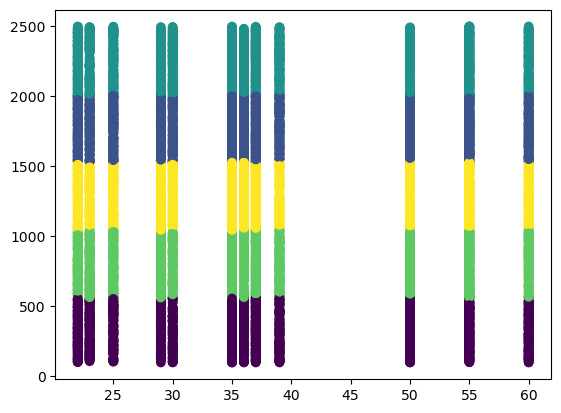

In [22]:
c = int(input('Num of clusters  (Its recomended to be between 2 & 4 ) : '))
kmeans = KMeans(n_clusters=c)
kmeans.fit(g_dataa[['age', 'total']])
plt.scatter(x=g_dataa['age'], y=g_dataa['total'], c=kmeans.labels_)
plt.show()

In [23]:
data = g_dataa[['items','count']]
data_Association = data['items'].str.split(",")

In [24]:
x = float(input('Support value  (Its recomended to be between 0.001 & 1 ) : '))
y = float(input('Confidence value  (Its recomended to be between 0.001 & 1 ) : '))
association_rules = apriori(data_Association, min_support=x, min_confidence= y, min_lift=3, min_length=2)
association_results = list(association_rules)
print(len(association_results))

Support value : 0.01
Confidence value : 0.05


5

In [25]:
for item in association_results:
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: root vegetables -> beef
Support: 0.017386883579054397
Confidence: 0.3313953488372093
Lift: 3.0403668431100312
Rule: other vegetables -> root vegetables
Support: 0.010371123538383325
Confidence: 0.053599579611140306
Lift: 3.0296084222733612
Rule: yogurt -> whole milk
Support: 0.010066090493136757
Confidence: 0.18893129770992367
Lift: 3.37230365331597
Rule: other vegetables -> root vegetables
Support: 0.012302999491611592
Confidence: 0.06358381502890173
Lift: 3.020999134344196
Rule: other vegetables -> yogurt
Support: 0.010167768174885612
Confidence: 0.14184397163120566
Lift: 3.267061969538425
